# Variable Importance Plot
Visualize the ranking of the four top multivariate variables based on the calculation of the variable importance. Also show the distribution of AUC differentials.
### Import pythonic libraries

In [1]:
import matplotlib.pyplot as plt
import os
import mplhep as hep
import warnings
import numpy as np
import ipywidgets as widgets

plt.style.use(hep.style.CMS)

Choose a set of results (`.txt`, `.npy`) to display

In [2]:
file_list = next(os.walk(os.getcwd()))[1]

print("Choose a set of results to display:")
file_names = widgets.Dropdown(options=sorted(file_list))
file_names

Choose a set of results to display:


Dropdown(options=('.git', '.sys.v#.Correlation Consideration.ipynb', '.sys.v#.Correlation Pandas.ipynb', '.sys…

### Extract importance values from file and sort

In [3]:
results_dir = os.listdir(os.getcwd() + "/" + file_names.value)
ROC_name = [name for name in results_dir if "ROC" in name]
nVars = int(ROC_name[0].split("vars")[0].split("ROC_hists_")[1])
file_path = file_names.value

sum = []
mean = []
rms = []
significance = []
variable = []
frequency = []
normalization = 0

start_reading = False   # don't edit

with open(file_path + "/VariableImportanceResults_" + str(nVars) + "vars.txt") as file:
    for line in file.readlines():
        if start_reading == True:
            content = line.split("/")
            variable.append(content[1].strip())
            frequency.append(float(content[2].strip()))
            sum.append(float(content[3].strip()))
            mean.append(float(content[4].strip()))
            rms.append(float(content[5].strip()))
            significance.append(float(content[6].strip()))
        if "Variable Name" in line: start_reading = True
        if "Normalization" in line: 
            normalization = float(line.split(":")[1])

significanceSort, meanSort, rmsSort, sumSort, variableSort = zip(*sorted(zip(
    significance, mean, rms, sum, variable
    ),reverse=True))

### Plot the ranking

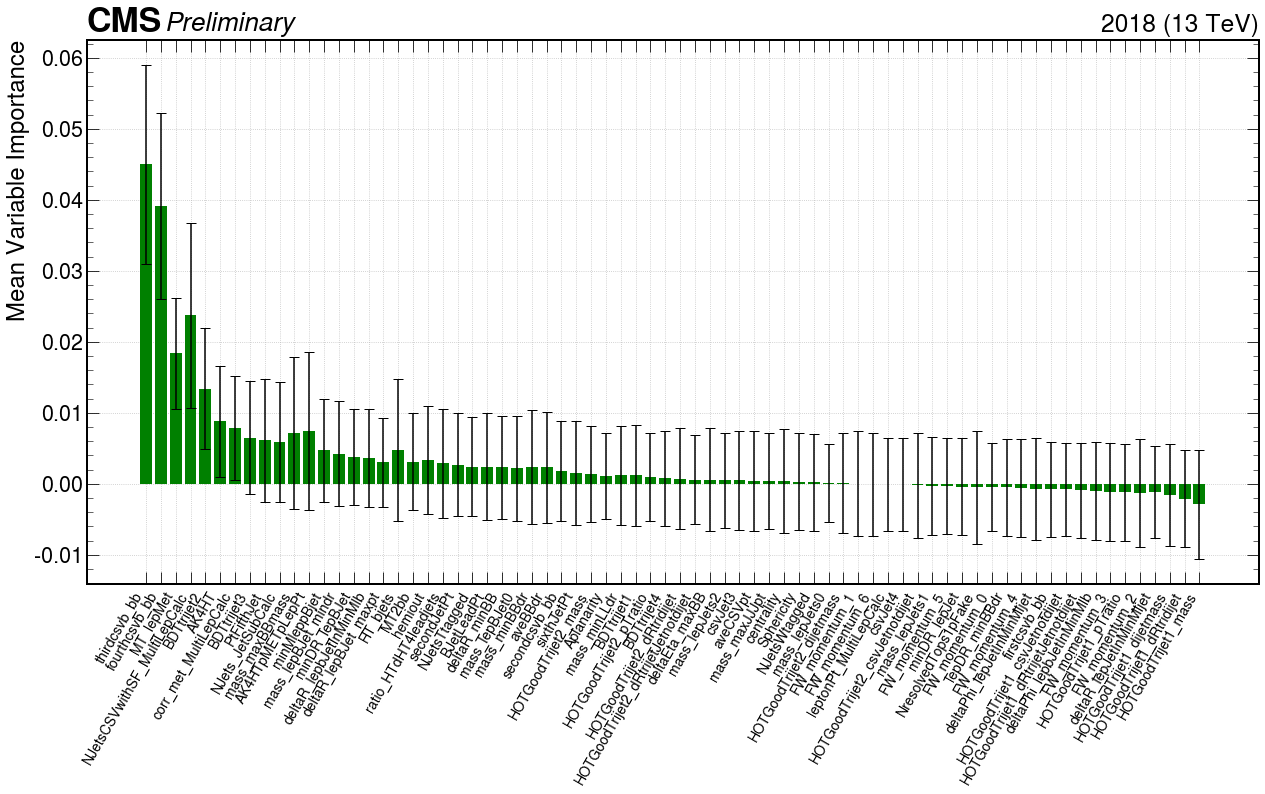

In [8]:
plt.style.use(hep.style.CMS)
plt.rc("axes",axisbelow=True)
plt.figure(figsize=(int(nVars/4)+3,10))
plt.bar(variableSort,meanSort,yerr=rmsSort,
         align='center',capsize=5.0,color="green")
#plt.title('Significance Ranking')
plt.grid(which = "major",linestyle = ':')
plt.ylabel('Mean Variable Importance', horizontalalignment = "right", y=1.0, fontsize = 24)
plt.tick_params(axis="x",which="minor",length=0)
plt.xticks(horizontalalignment="right",rotation=60, fontsize=14)
hep.cms.text("Preliminary")
hep.cms.lumitext("{} (13 TeV)".format(file_names.value.split("_")[2]))
plt.savefig(file_path + \
            "/VariableImportanceResults_" + str(nVars) + "vars.png")
plt.show()

### Plot the sampling frequency for each variable

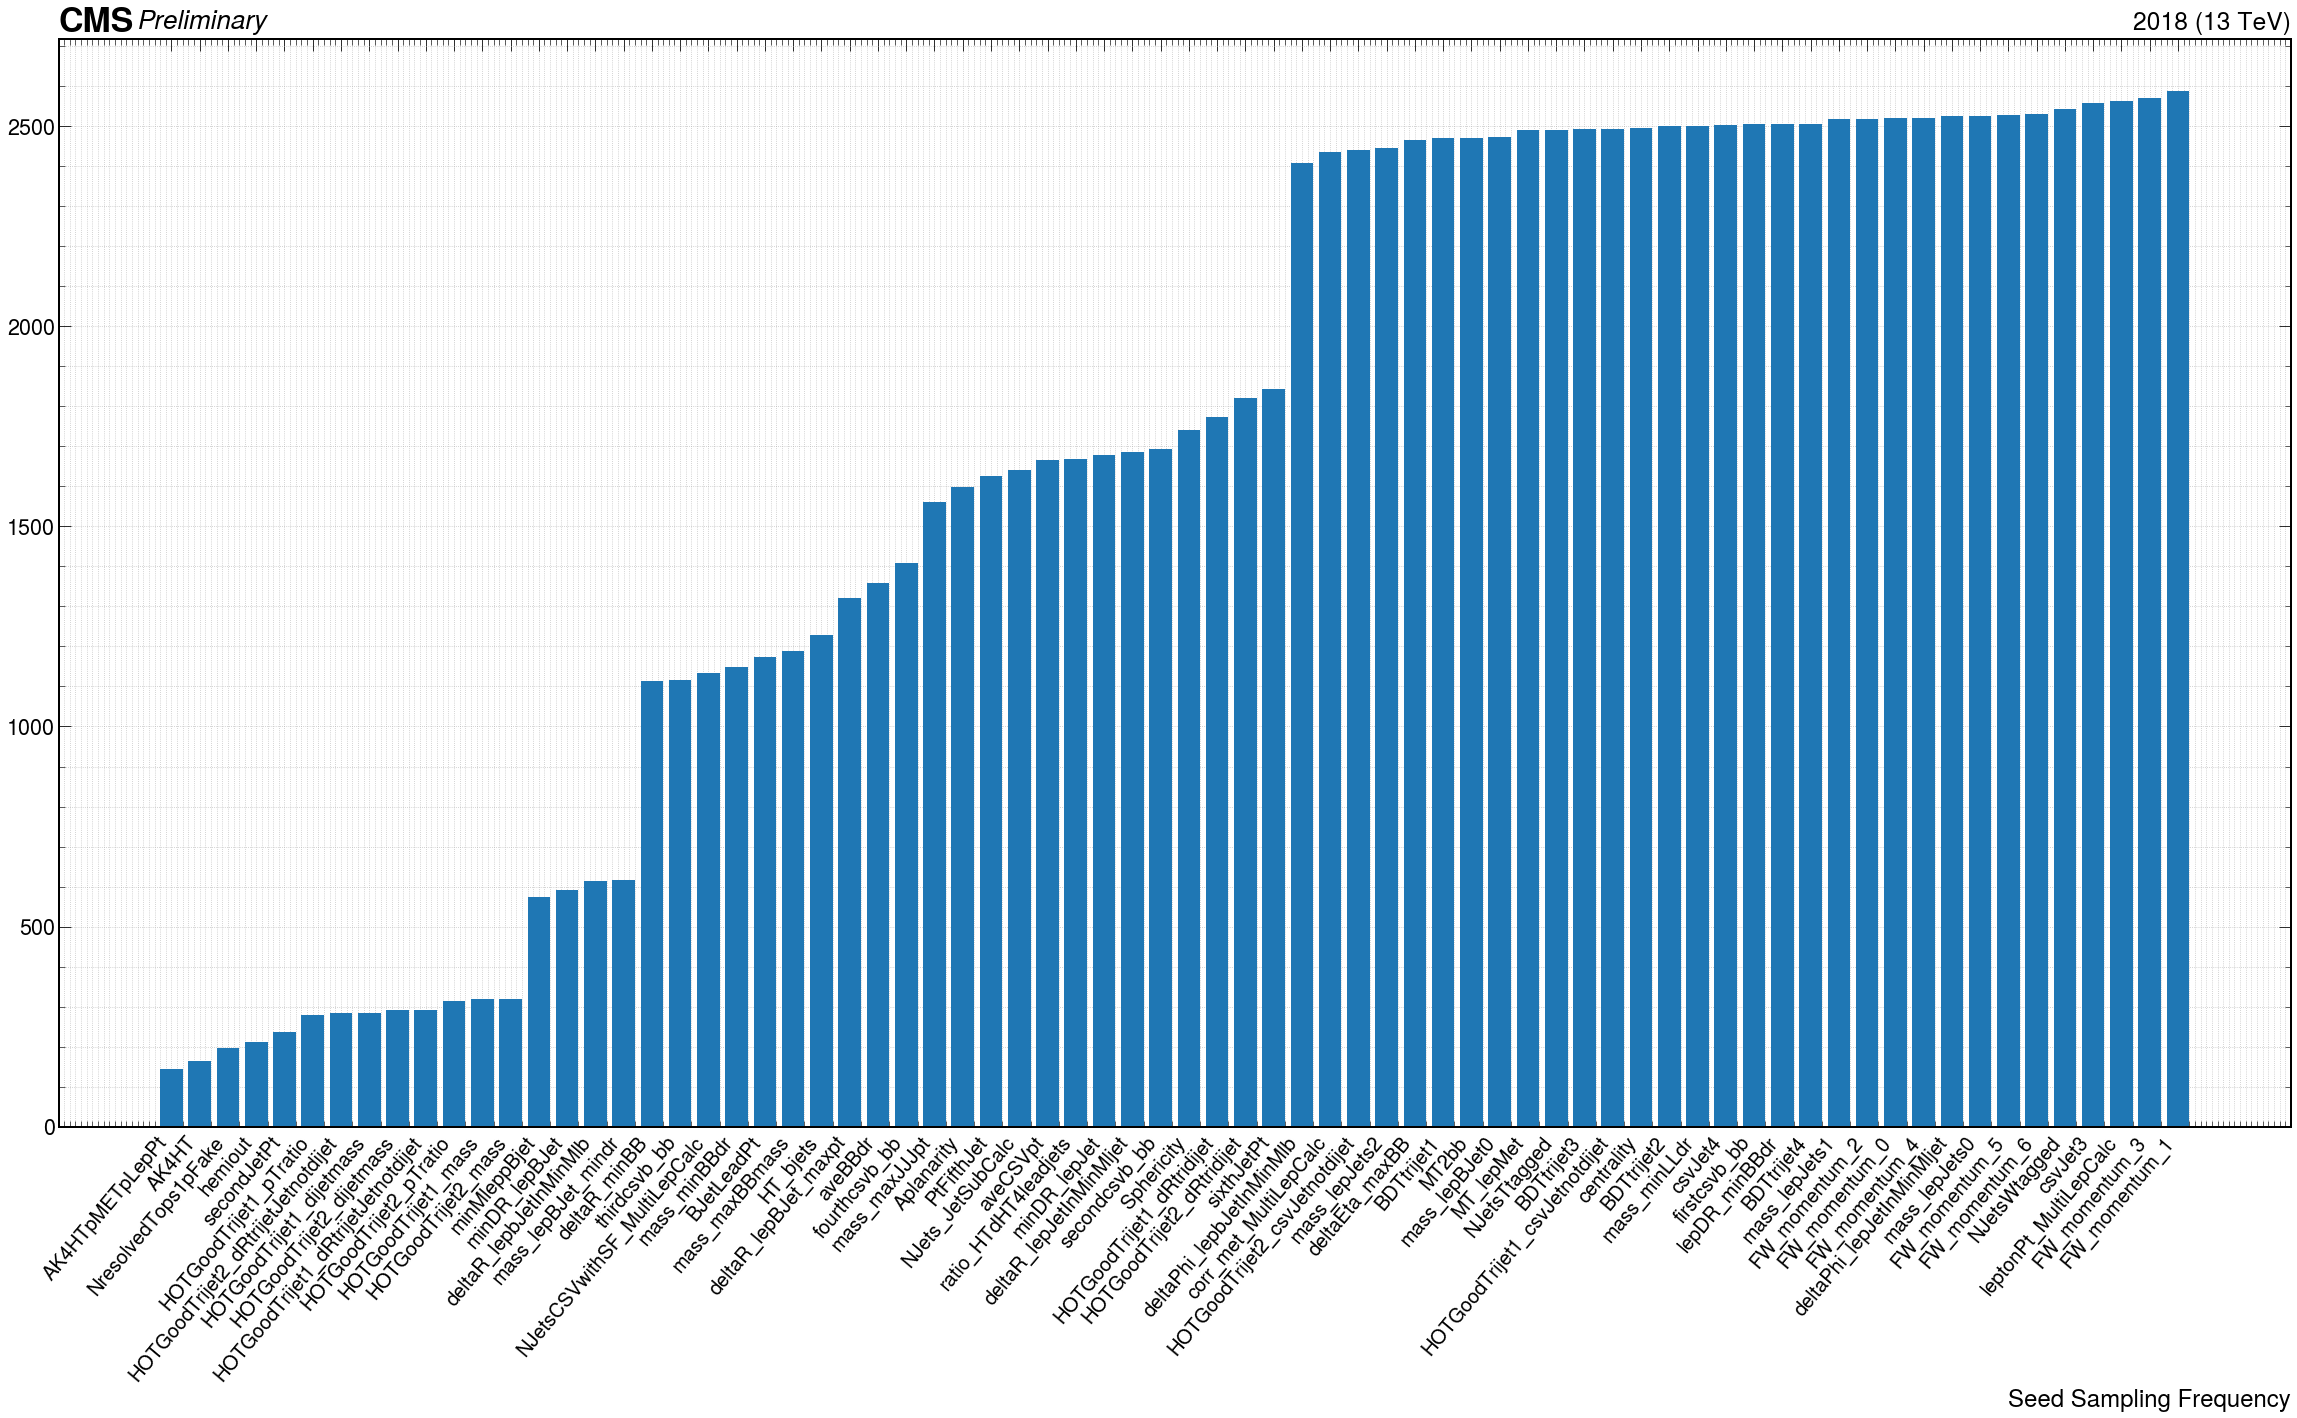

In [9]:
plt.style.use(hep.style.CMS)
frequencySort, variableSort2 = zip(*sorted(zip(
    frequency, variable
    )))

plt.close()
plt.figure(figsize=(40,20))
plt.bar(variableSort2,frequencySort,)
#plt.title('TTTT TMVA DNN ' + str(nVars) + ' Seed Sampling Frequency') 
plt.grid(which = 'both',linestyle = ':')
plt.xlabel('Seed Sampling Frequency', horizontalalignment = 'right', x=1.0, fontsize = 24) 
plt.xticks(horizontalalignment='right',rotation=50, fontsize=20)
plt.savefig(file_path + \
            "/VariableImportanceSamplingFrequency_" + str(nVars) + "vars" + \
            ".png")
#plt.style.use(hep.style.CMS)
hep.cms.text("Preliminary")
hep.cms.lumitext("2018 (13 TeV)")
plt.show()

### Plot ROC AUC differential distributions
Load in the AUC differentials

In [10]:
importance_dict = np.load(file_path + "/ROC_hists_" + str(nVars) + "vars.npy",
                          allow_pickle=True).item()
importance_keys = list(importance_dict.keys())
print("Choose a variable to view:")
key_names = widgets.Dropdown(options=sorted(importance_keys))
key_names

Choose a variable to view:


Dropdown(options=('AK4HT', 'AK4HTpMETpLepPt', 'Aplanarity', 'BDTtrijet1', 'BDTtrijet2', 'BDTtrijet3', 'BDTtrij…

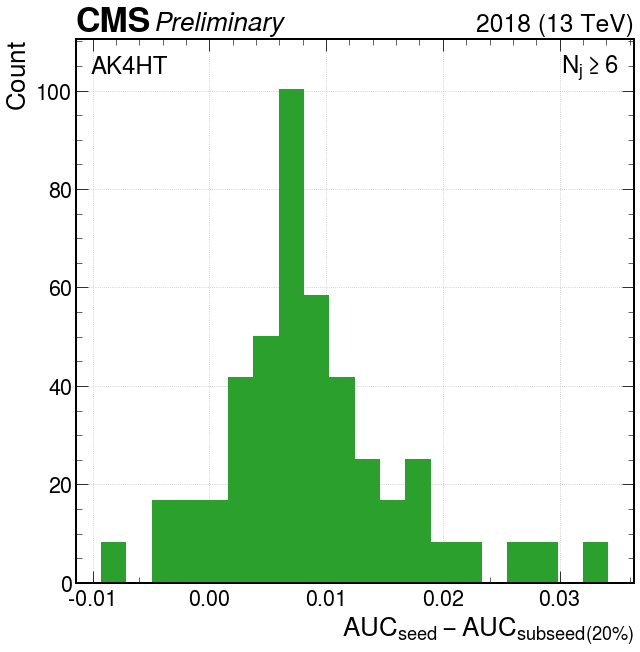

In [11]:
plt.style.use(hep.style.CMS)

key = key_names.value

plt.close()
plt.rc("axes",axisbelow=True)
plt.figure()

plt.annotate(
    key,
    xycoords = "axes pixels",
    xy = (15,510),
    fontsize=24
)
plt.annotate(
    "$N_j\geq{}$".format(file_names.value.split("_")[1][0]),
    xycoords = "axes pixels",
    xy = (485,510),
    fontsize=24
)

plt.xlabel(r"$AUC_{{seed}}-AUC_{{subseed({}\%)}}$".format(file_names.value.split("_")[2][:2]),
           fontsize=26, horizontalalignment = 'right', x=1.0)
plt.ylabel(r"$Count$",fontsize=26, horizontalalignment = 'right', y=1.0)
#plt.yscale("log")
importance_dict[key] = np.array(importance_dict[key])
hist, _, _ = plt.hist(importance_dict[key],bins=20,color="C2",density=True )
#plt.xlim(-0.01,0.05)
plt.ylim(0,max(hist)*1.1)
plt.grid(which="major",linestyle=":")
hep.cms.text("Preliminary")
hep.cms.lumitext("{} (13 TeV)".format(file_names.value.split("_")[2]))
plt.show()